In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 데이터 호출
df = pd.read_csv('Mall_Customers.csv')
df.info() #데이터 분석, ->결측치 없음. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#사용할 컬럼 결정. 
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
#사용 데이터 분포 확인
X.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
#스텐다드 스켈일러 정의 
scaler = StandardScaler()

#데이터 정규화
X_scaled = scaler.fit_transform(X)

c:\Users\shinc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shinc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shinc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shinc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

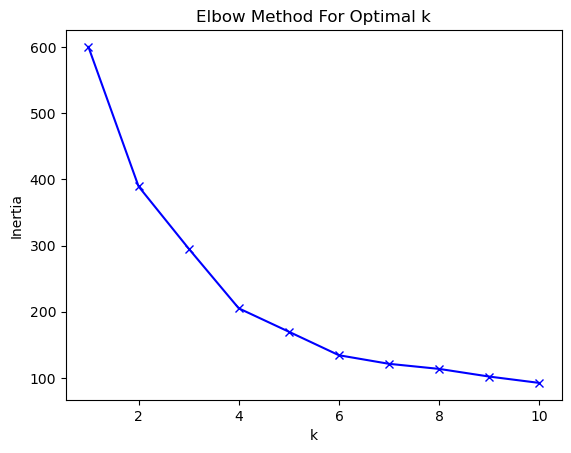

In [7]:
# kmean 모델 
# 최적의 k 찾기 (엘보우 방법)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure()
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


c:\Users\shinc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


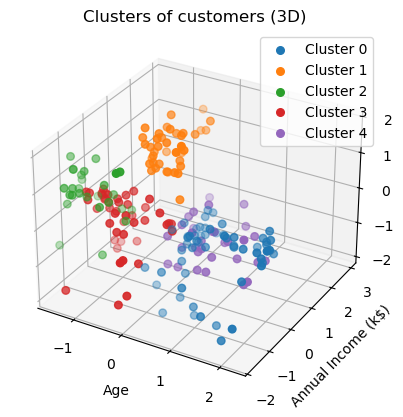

Silhouette Score : 0.40846873777345605


In [8]:
#모델 학습 과정
# k=5로 모델 생성 및 학습
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# 군집 결과 할당
label = kmeans.labels_

# 3차원 산포도 영역 생성. 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 각 클러스터별로 데이터를 시각화
for i in range(len(set(label))):
    ax.scatter(X_scaled[label == i, 0], X_scaled[label == i, 1], X_scaled[label == i, 2], s=30, label=f'Cluster {i}')

# 제목과 축 라벨 설정
ax.set_title('Clusters of customers (3D)')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')

# 범례 추가
ax.legend()
# 그래프 시각화
plt.show()

#실루엣 점수 계산
kmeans_silhouette_avg = silhouette_score(X_scaled, label)
print(f'Silhouette Score : {kmeans_silhouette_avg}')

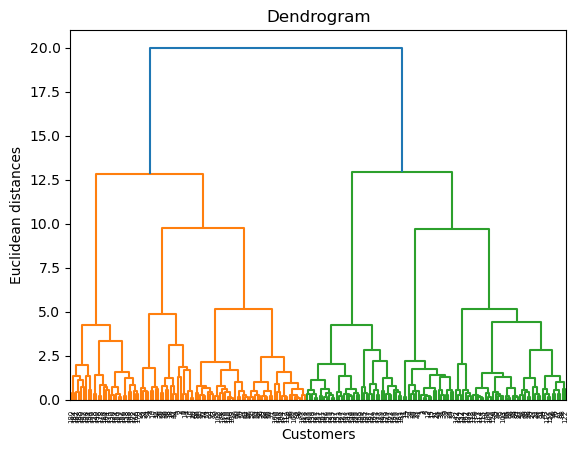

In [9]:
#계층적 군집화 모델 결정 과정. 
# 덴드로그램 생성
plt.figure()
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward')) # Ward’s Minimum Variance Method를 사용하여 클러스터간 거리 계산. 
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [10]:
# 실루엣 점수를 이용한 최적의 n_clusters 판단. 
silhouette = []
for i in range(2,11):
    hc = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward') #클러스터 수 i개, 거리 기준 : 유클리디안 거리, Ward’s Minimum Variance Method를 사용하여 클러스터간 거리 계산. 
    # 모델 학습 및 예측. 
    y_hc = hc.fit_predict(X_scaled)

    # 실루엣 점수 계산 
    silhouette_avg = silhouette_score(X_scaled, y_hc)
    silhouette.append([i,silhouette_avg])
    print(f'Silhouette Score {i}: {silhouette_avg}')

Silhouette Score 2: 0.31795733680759597
Silhouette Score 3: 0.32148866683112387
Silhouette Score 4: 0.3614512741691407
Silhouette Score 5: 0.39002826186267214
Silhouette Score 6: 0.4201169558789579
Silhouette Score 7: 0.3982948069934959
Silhouette Score 8: 0.36647935858620484
Silhouette Score 9: 0.3753854624760521
Silhouette Score 10: 0.3808885873908943


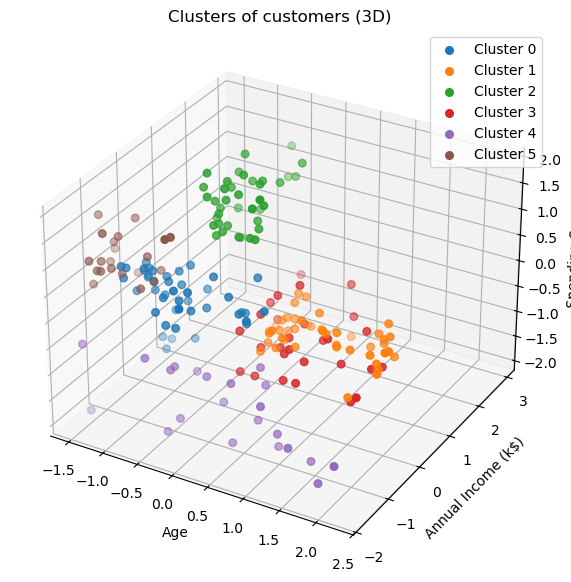

Silhouette Score : 0.4201169558789579


In [11]:
# 계층적 군집화 모델 생성 클러스터 수가 6일때 실루엣 스코어가 가장 좋음. 
hc = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')

# 모델 학습 및 예측
label = hc.fit_predict(X_scaled)

# 3차원 산포도 영역 생성. 
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

# 각 클러스터별로 데이터를 시각화
for i in range(len(set(label))):
    ax.scatter(X_scaled[label == i, 0], X_scaled[label == i, 1], X_scaled[label == i, 2], s=30, label=f'Cluster {i}')

# 제목과 축 라벨 설정
ax.set_title('Clusters of customers (3D)')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')

# 범례 추가
ax.legend()
plt.show()

AC_silhouette_avg = silhouette_score(X_scaled, label)
print(f'Silhouette Score : {AC_silhouette_avg}')


In [12]:
# 최적 파라미터와 실루엣 점수를 저장할 변수
best_eps = None
best_min_samples = None
best_score = -1

# 결과 저장용 리스트 생성. 
results = []

#DBSCAN 모델의 최적 클러스터 조건 검색
for eps in range(3, 10):
    for min_samples in range(3, 10):
        # DBSCAN 모델 학습
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)
        
        # 클러스터가 하나뿐인 경우 실루엣 점수를 계산하지 않음
        if len(set(clusters)) <= 1:
            continue
        
        # 실루엣 점수 계산
        score = silhouette_score(X, clusters)
        results.append((eps, min_samples, score))
   
        
        # 최적 파라미터 업데이트
        if score > best_score:
            best_eps = eps
            best_min_samples = min_samples
            best_score = score
            
#최적 파라미터 출력. 
print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score:.2f}")

Best eps: 9, Best min_samples: 3, Best Silhouette Score: 0.11


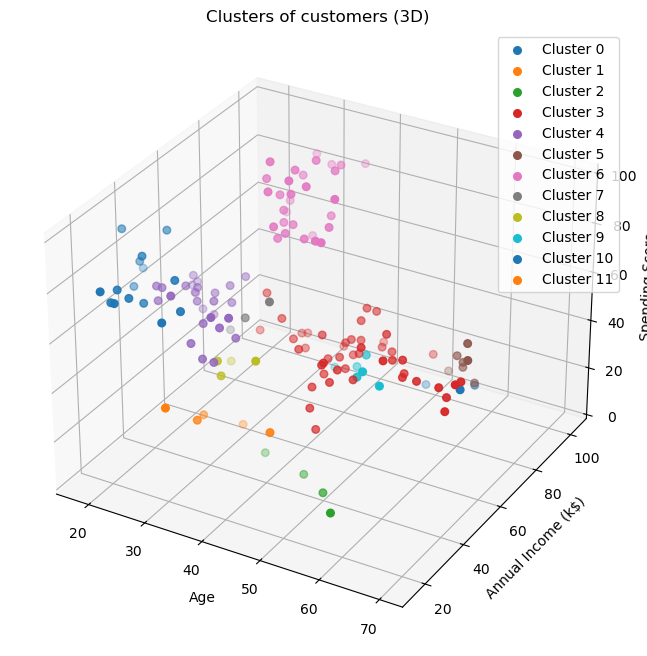

Silhouette Score : 0.11395369330062792


In [13]:
# DBSCAN 모델 생성
dbscan = DBSCAN(eps=9, min_samples=3)

# 모델 학습 및 예측
label = dbscan.fit_predict(X) #거리 계산 문제로 스케일링 할 경우 제대로 분류가 되지 않음. 

# 3차원 산포도 영역 생성. 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')

plot_X = X.to_numpy() #시각화를 위해 np.array로 변환. 

# 각 클러스터별로 데이터를 시각화
for i in range(len(set(label))):
    ax.scatter(plot_X[label == i, 0], plot_X[label == i, 1], plot_X[label == i, 2], s=30, label=f'Cluster {i}')

# 제목과 축 라벨 설정
ax.set_title('Clusters of customers (3D)')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')

# 범례 추가
ax.legend()
#그래프 시각화
plt.show()

DBSCAN_silhouette_avg = silhouette_score(plot_X, label)
print(f'Silhouette Score : {DBSCAN_silhouette_avg}')



In [14]:
for i in range(2,11):
    gmm = GaussianMixture(n_components=i, random_state=42)
    clusters = gmm.fit_predict(X_scaled)

    # 실루엣 점수 계산 #실루엣 점수란?
    silhouette_avg = silhouette_score(X_scaled, clusters)
    silhouette.append([i,silhouette_avg])
    print(f'Silhouette Score {i}: {silhouette_avg}')
    

Silhouette Score 2: 0.32878810196300934
Silhouette Score 3: 0.33478209374027373
Silhouette Score 4: 0.3734466371028913
Silhouette Score 5: 0.37644074990819204
Silhouette Score 6: 0.3999977925024676
Silhouette Score 7: 0.3943102140586201
Silhouette Score 8: 0.3432805854954596
Silhouette Score 9: 0.3401144910196312
Silhouette Score 10: 0.30505814101544054


c:\Users\shinc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shinc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shinc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shinc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

c:\Users\shinc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


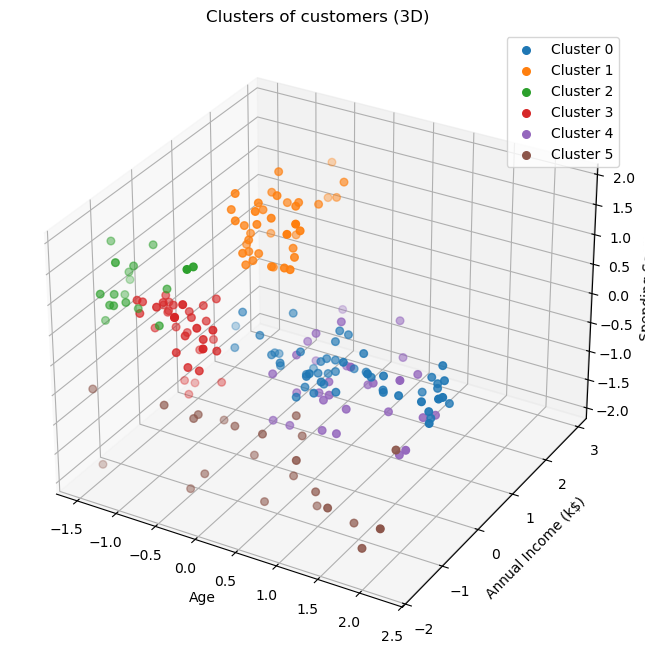

Silhouette Score 5: 0.3999977925024676


In [15]:
#gaussianmixture 모델 정의 
gmm = GaussianMixture(n_components=6, random_state=42)
clusters = gmm.fit_predict(X_scaled) # 클러스터 분류

# 3차원 산포도 영역 생성. 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')

# 각 클러스터별로 데이터를 시각화
for i in range(len(set(clusters))):
    ax.scatter(X_scaled[clusters == i, 0], X_scaled[clusters == i, 1], X_scaled[clusters == i, 2], s=30, label=f'Cluster {i}')

# 제목과 축 라벨 설정
ax.set_title('Clusters of customers (3D)')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')

# 범례 추가
ax.legend()
# 그래프 시각화
plt.show()

#실루엣 점수 계산 및 출력
gmm_silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score {i}: {gmm_silhouette_avg}')


In [16]:
#클러스터링 수준 비교. -> 계층적 군집화가 가장 성능이 나음. 
print(f'Kmeans_Silhouette Score : {kmeans_silhouette_avg}')
print(f'AC_Silhouette Score : {AC_silhouette_avg}')
print(f'DBSCAN_Silhouette Score : {DBSCAN_silhouette_avg}')
print(f'GMM_Silhouette Score : {gmm_silhouette_avg}')

Kmeans_Silhouette Score : 0.40846873777345605
AC_Silhouette Score : 0.4201169558789579
DBSCAN_Silhouette Score : 0.11395369330062792
GMM_Silhouette Score : 0.3999977925024676
